In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [21]:
train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')
submission = pd.read_csv('dataset/sample_submission.csv')

In [22]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [23]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
items_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [25]:
train = pd.merge(train, items, on="item_id")
train = pd.merge(train, items_categories, on="item_category_id")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [8]:
sales_by_category = train.groupby("item_category_name", as_index = False)["item_price"].sum().sort_values(by = "item_price")
top_sales = sales_by_category.nlargest(n=15, columns=["item_price"])
top_sales.set_index(np.arange(0,len(top_sales),1))

,item_category_name,item_price
0,Игры - PS3,3.148364e+08
1,Игры - PS4,2.207125e+08
2,Игры - XBOX 360,2.171441e+08
3,Игры PC - Стандартные издания,1.755141e+08
4,Игровые консоли - PS4,1.694266e+08
5,Кино - DVD,1.447424e+08
6,Музыка - CD локального производства,9.719241e+07
7,Игры PC - Дополнительные издания,8.590357e+07
8,Кино - Blu-Ray,8.367633e+07
9,Программы - Для дома и офиса,7.923592e+07


In [9]:
from googletrans import Translator
translator = Translator()
i = 0
for row in top_sales["item_category_name"]:
    english_word = translator.translate(row)
    top_sales.iloc[i,0] = english_word.text
    i+=1

In [19]:
top_sales.head()

,item_category_name,item_price,item_category
19,Books - Postcards,3.148364e+08,Games
20,Books - Cognitive Literature,2.207125e+08,Games
23,PC - Headsets / Headphones,2.171441e+08,Games
30,Книги - Путеводители,1.755141e+08,PC Games
12,Accessories - PS2,1.694266e+08,Game Consoles


Text(0, 0.5, 'Category-Product')

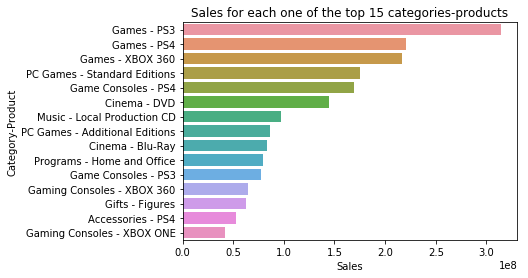

In [11]:
sns.barplot(y = "item_category_name", x = "item_price", data = top_sales)
plt.title("Sales for each one of the top 15 categories-products")
plt.xlabel("Sales")
plt.ylabel("Category-Product")

In [12]:
top_sales["item_category"] = top_sales.item_category_name.str.extract('([A-Za-z\ ]+)', expand=False) 
top_sales.head()

,item_category_name,item_price,item_category
19,Games - PS3,3.148364e+08,Games
20,Games - PS4,2.207125e+08,Games
23,Games - XBOX 360,2.171441e+08,Games
30,PC Games - Standard Editions,1.755141e+08,PC Games
12,Game Consoles - PS4,1.694266e+08,Game Consoles


Text(0, 0.5, 'Category-Product')

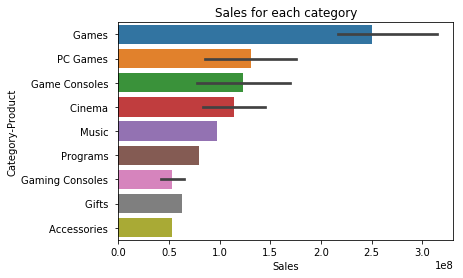

In [13]:
sns.barplot(y = "item_category", x = "item_price", data = top_sales)
plt.title("Sales for each category")
plt.xlabel("Sales")
plt.ylabel("Category-Product")

In [29]:
i = 0
for row in sales_by_category["item_category_name"]:
    english_word = translator.translate(row)
    sales_by_category.iloc[i,0] = english_word.text
    i+=1
sales_by_category

,item_category_name,item_price
0,Books - Postcards,4.100000e+01
1,Books - Cognitive Literature,1.290000e+02
2,PC - Headsets / Headphones,2.634000e+02
3,Books - Travel Guides,3.000000e+02
4,Accessories - PS2,4.310000e+02
5,Books - Fiction,8.470000e+02
6,Books - Computer Literature,1.654000e+03
7,Game Consoles - PS2,1.998000e+03
8,Games - PS2,3.828200e+03
9,Books - Business Literature,4.502000e+03


In [27]:
sales_by_category.to_csv('translation_sales_by_category.csv',index=False)

In [28]:
sales_by_category = pd.read_csv('translation_sales_by_category.csv')

In [30]:
sales_by_category

,item_category_name,item_price
0,Books - Postcards,4.100000e+01
1,Books - Cognitive Literature,1.290000e+02
2,PC - Headsets / Headphones,2.634000e+02
3,Books - Travel Guides,3.000000e+02
4,Accessories - PS2,4.310000e+02
5,Books - Fiction,8.470000e+02
6,Books - Computer Literature,1.654000e+03
7,Game Consoles - PS2,1.998000e+03
8,Games - PS2,3.828200e+03
9,Books - Business Literature,4.502000e+03
